In [1]:
# module imports
import argparse
import os
import numpy as np

import pandas as pd
from matplotlib import pyplot as plt

# processing imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Load data

In [2]:
raw_train_data = pd.read_csv(r"../data/UNSW-NB15-Dataset/UNSW_NB15_training-set.csv")
raw_train_data['service']= np.where(raw_train_data['service'] == '-', 'other', raw_train_data['service'])
raw_test_data = pd.read_csv(r"../data/UNSW-NB15-Dataset/UNSW_NB15_testing-set.csv")
raw_test_data['service']= np.where(raw_test_data['service'] == '-', 'other', raw_test_data['service'])
features = pd.read_csv(r"../data/UNSW-NB15-Dataset/UNSW_NB15_features.csv")

### Analysis data

In [3]:
raw_train_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,other,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,other,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,other,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,other,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
raw_test_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,other,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,other,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,other,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,other,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,other,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [6]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [7]:
raw_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [8]:
raw_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [9]:
raw_train_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,175341.0,NaN,NaN,NaN,87671.0,50616.731112,1.0,43836.0,87671.0,131506.0,175341.0
dur,175341.0,NaN,NaN,NaN,1.359389,6.480249,0.0,0.000008,0.001582,0.668069,59.999989
proto,175341,133,tcp,79946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
service,175341,13,other,94168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,175341,9,INT,82275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spkts,175341.0,NaN,NaN,NaN,20.298664,136.887597,1.0,2.0,2.0,12.0,9616.0
dpkts,175341.0,NaN,NaN,NaN,18.969591,110.258271,0.0,0.0,2.0,10.0,10974.0
sbytes,175341.0,NaN,NaN,NaN,8844.843836,174765.644309,28.0,114.0,430.0,1418.0,12965233.0
dbytes,175341.0,NaN,NaN,NaN,14928.918564,143654.217718,0.0,0.0,164.0,1102.0,14655550.0
rate,175341.0,NaN,NaN,NaN,95406.187105,165400.978457,0.0,32.78614,3225.80652,125000.0003,1000000.003


In [10]:
raw_test_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,82332.0,NaN,NaN,NaN,41166.5,23767.345519,1.0,20583.75,41166.5,61749.25,82332.0
dur,82332.0,NaN,NaN,NaN,1.006756,4.710444,0.0,0.000008,0.014138,0.71936,59.999989
proto,82332,131,tcp,43095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
service,82332,13,other,47153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,82332,7,FIN,39339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spkts,82332.0,NaN,NaN,NaN,18.666472,133.916353,1.0,2.0,6.0,12.0,10646.0
dpkts,82332.0,NaN,NaN,NaN,17.545936,115.574086,0.0,0.0,2.0,10.0,11018.0
sbytes,82332.0,NaN,NaN,NaN,7993.908165,171642.26188,24.0,114.0,534.0,1280.0,14355774.0
dbytes,82332.0,NaN,NaN,NaN,13233.785563,151471.456091,0.0,0.0,178.0,956.0,14657531.0
rate,82332.0,NaN,NaN,NaN,82410.886739,148620.367041,0.0,28.606114,2650.176667,111111.1072,1000000.003


attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64


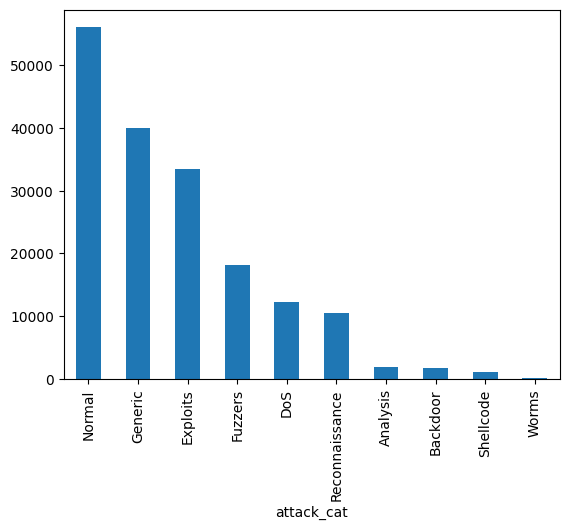

In [11]:
raw_train_data['attack_cat'].value_counts().plot.bar()
print(raw_train_data['attack_cat'].value_counts())

attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64


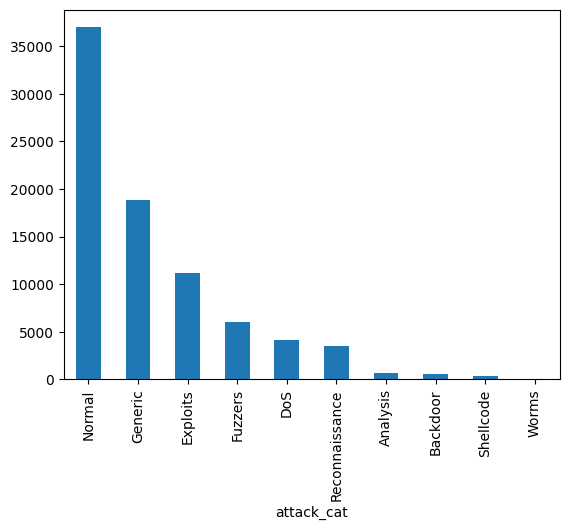

In [12]:
raw_test_data['attack_cat'].value_counts().plot.bar()
print(raw_test_data['attack_cat'].value_counts())

<Axes: xlabel='service'>

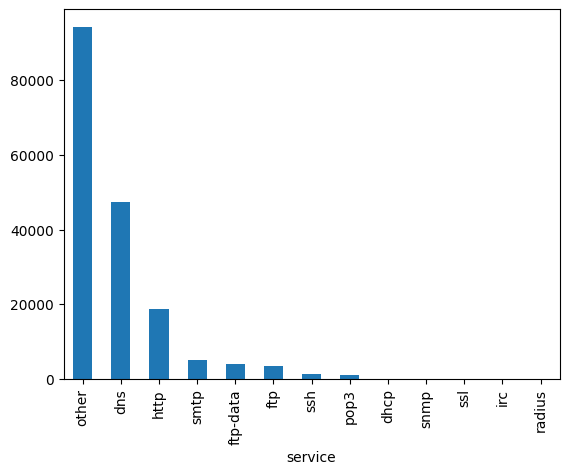

In [13]:
raw_train_data['service'].value_counts().plot.bar()

In [14]:
print(raw_train_data.isnull().sum())
raw_train_data.dropna(inplace=True)
print(raw_test_data.isnull().sum())
raw_test_data.dropna(inplace=True)

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [15]:
train_data = raw_train_data.drop(columns=['id', 'label'])
test_data = raw_test_data.drop(columns=['id', 'label'])

In [16]:
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [18]:
x = np.random.choice([0,1], size=42)
x

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [21]:
X_train.iloc[:, x==1]

,dur,proto,state,spkts,dpkts,rate,sload,dload,dloss,dinpkt,stcpb,dtcpb,dwin,tcprtt,ackdat,trans_depth,ct_srv_src,ct_src_dport_ltm,is_ftp_login,ct_srv_dst
0,0.121478,tcp,FIN,6,4,74.087490,1.415894e+04,8495.365234,0,8.375000,621772692,2202533631,255,0.000000,0.000000,0,1,1,0,1
1,0.649902,tcp,FIN,14,38,78.473372,8.395112e+03,503571.312500,17,15.432865,1417884146,3077387971,255,0.000000,0.000000,0,43,1,0,6
2,1.623129,tcp,FIN,8,16,14.170161,1.572272e+03,60929.230470,6,102.737203,2116150707,2963114973,255,0.111897,0.050439,0,7,1,0,6
3,1.681642,tcp,FIN,12,12,13.677108,2.740179e+03,3358.622070,3,90.235726,1107119177,1047442890,255,0.000000,0.000000,0,1,1,1,1
4,0.449454,tcp,FIN,10,6,33.373826,8.561499e+03,3987.059814,1,75.659602,2436137549,1977154190,255,0.128381,0.057234,0,43,2,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,INT,2,0,111111.107200,5.066666e+07,0.000000,0,0.000000,0,0,0,0.000000,0.000000,0,24,24,0,24
175337,0.505762,tcp,FIN,10,8,33.612649,8.826286e+03,4903.492188,1,66.980570,3518776216,3453092386,255,0.099440,0.062545,0,1,1,0,1
175338,0.000009,udp,INT,2,0,111111.107200,5.066666e+07,0.000000,0,0.000000,0,0,0,0.000000,0.000000,0,12,3,0,12
175339,0.000009,udp,INT,2,0,111111.107200,5.066666e+07,0.000000,0,0.000000,0,0,0,0.000000,0.000000,0,30,30,0,30


In [135]:
numerical_features = X_train.select_dtypes(include=[np.number]).columns
print(numerical_features)
categorical_features = X_train.select_dtypes(exclude=[np.number]).columns
print(categorical_features)
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')
Index(['proto', 'service', 'state'], dtype='object')


In [136]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 42 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  object 
 2   service            175341 non-null  object 
 3   state              175341 non-null  object 
 4   spkts              175341 non-null  float64
 5   dpkts              175341 non-null  float64
 6   sbytes             175341 non-null  float64
 7   dbytes             175341 non-null  float64
 8   rate               175341 non-null  float64
 9   sttl               175341 non-null  float64
 10  dttl               175341 non-null  float64
 11  sload              175341 non-null  float64
 12  dload              175341 non-null  float64
 13  sloss              175341 non-null  float64
 14  dloss              175341 non-null  float64
 15  sinpkt             175341 non-null  float64
 16  di

In [137]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   proto              82332 non-null  object 
 2   service            82332 non-null  object 
 3   state              82332 non-null  object 
 4   spkts              82332 non-null  float64
 5   dpkts              82332 non-null  float64
 6   sbytes             82332 non-null  float64
 7   dbytes             82332 non-null  float64
 8   rate               82332 non-null  float64
 9   sttl               82332 non-null  float64
 10  dttl               82332 non-null  float64
 11  sload              82332 non-null  float64
 12  dload              82332 non-null  float64
 13  sloss              82332 non-null  float64
 14  dloss              82332 non-null  float64
 15  sinpkt             82332 non-null  float64
 16  dinpkt             823

In [138]:
from utils import TrainingClassifier
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.3)
categorical_columns = list(X_train.select_dtypes(exclude=["number"]).columns)
if categorical_columns:
    print(categorical_columns)
else:
    print(y_train.value_counts())
    print("================No categorical columns=============")
categorical_features_indices = X_train.columns.get_indexer(categorical_columns)

['proto', 'service', 'state']


0:	learn: 0.6802376	test: 0.6814820	best: 0.6814820 (0)	total: 314ms	remaining: 2m 36s
1:	learn: 0.7469977	test: 0.7483984	best: 0.7483984 (1)	total: 633ms	remaining: 2m 37s
2:	learn: 0.7496374	test: 0.7517822	best: 0.7517822 (2)	total: 945ms	remaining: 2m 36s
3:	learn: 0.7613535	test: 0.7636827	best: 0.7636827 (3)	total: 1.28s	remaining: 2m 38s
4:	learn: 0.7695335	test: 0.7706024	best: 0.7706024 (4)	total: 1.63s	remaining: 2m 41s
5:	learn: 0.7731183	test: 0.7755071	best: 0.7755071 (5)	total: 1.94s	remaining: 2m 39s
6:	learn: 0.7803533	test: 0.7825029	best: 0.7825029 (6)	total: 2.26s	remaining: 2m 39s
7:	learn: 0.7833108	test: 0.7844800	best: 0.7844800 (7)	total: 2.55s	remaining: 2m 37s
8:	learn: 0.7855187	test: 0.7859628	best: 0.7859628 (8)	total: 2.87s	remaining: 2m 36s
9:	learn: 0.7856165	test: 0.7862289	best: 0.7862289 (9)	total: 3.14s	remaining: 2m 33s
10:	learn: 0.7844351	test: 0.7855446	best: 0.7862289 (9)	total: 3.46s	remaining: 2m 33s
11:	learn: 0.7853151	test: 0.7861529	best:

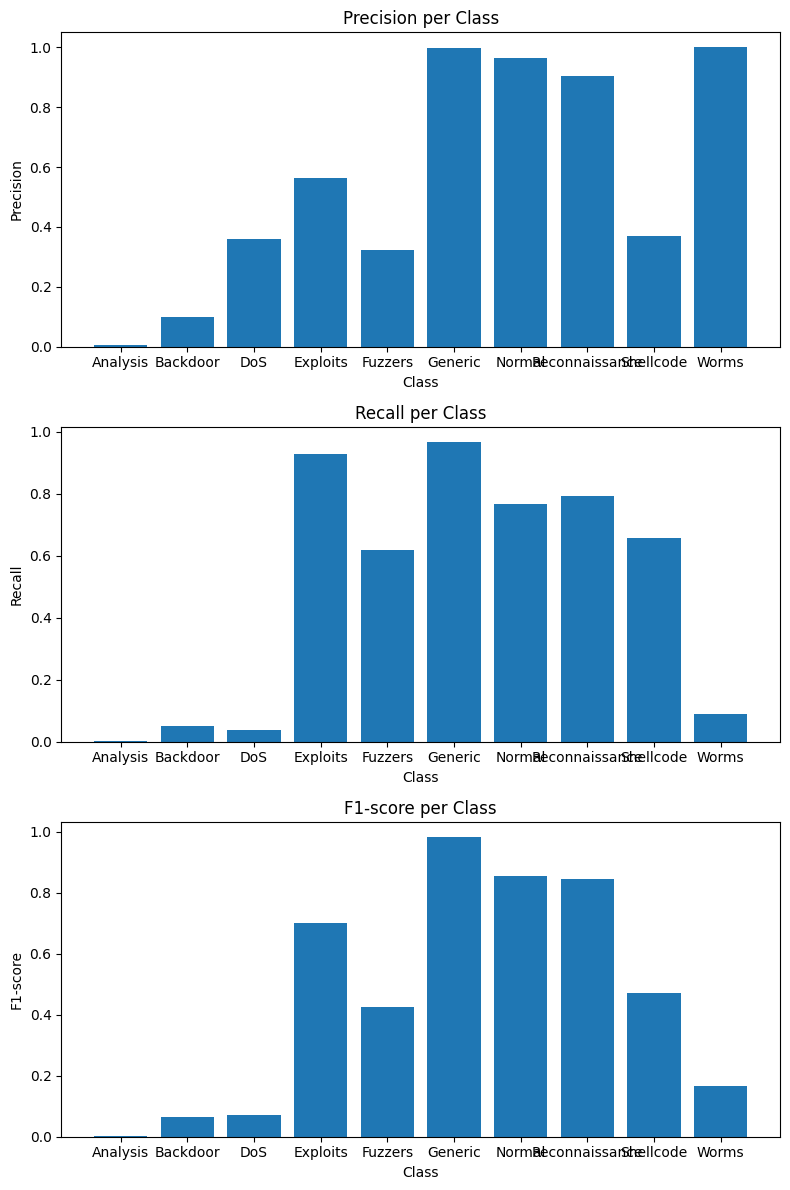

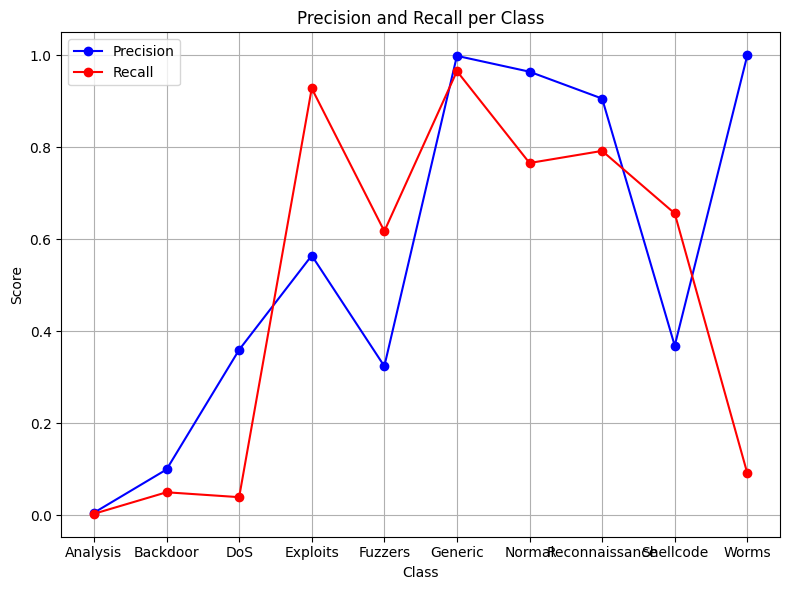

In [139]:
classifier = TrainingClassifier() 
classifier.train((X_train, y_train), (X_valid, y_valid), categorical_features_indices)
classifier.evaluate((X_test, y_test))
classifier.visulize_results()

In [140]:
print(y_test.value_counts())
np.unique(classifier.predict(X_test))

attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64


array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object)

In [141]:
print(y_train.value_counts())
np.unique(classifier.predict(X_train))

attack_cat
Normal            39257
Generic           28001
Exploits          23316
Fuzzers           12633
DoS                8619
Reconnaissance     7403
Analysis           1424
Backdoor           1214
Shellcode           778
Worms                93
Name: count, dtype: int64


array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object)